<a href="https://colab.research.google.com/github/Harshitalekya/EDA/blob/main/EDADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#21BDS0307 Chodisetti Harshitalekya
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv')
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [ ]:
# Get dimensions of the dataset (rows, columns)
print(df.shape)

(200, 6)


In [ ]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Get summary statistics for numerical columns
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# Check for missing values
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
dtype: int64


In [ ]:
# Fill missing values only for numerical columns
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

In [ ]:
# Fill missing values for categorical columns with the mode (most frequent value)
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [ ]:
# Check all column names
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
df['Age'] = df['Age'].astype('float')  # Example for converting a column to float

In [ ]:
# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

In [ ]:
# Rename columns (example)
df.rename(columns={'OldColumnName': 'NewColumnName'}, inplace=True)

In [ ]:
data = {
    'Age': [23, 47, 35, 67, 50],
    'Sex': ['F', 'M', 'F', 'M', 'F'],
    'Drug_Recommendation': ['DrugX', 'DrugY', 'DrugA', 'DrugB', 'DrugC']
}
df2 = pd.DataFrame(data)

In [ ]:
print("\nSecond DataFrame (df2):")
print(df2)


Second DataFrame (df2):
   Age Sex Drug_Recommendation
0   23   F               DrugX
1   47   M               DrugY
2   35   F               DrugA
3   67   M               DrugB
4   50   F               DrugC


In [ ]:
# 1. Inner join on 'Age' and 'Sex' columns
inner_merge = pd.merge(df, df2, on=['Age', 'Sex'], how='inner')
print("\nInner Merge Result:")
print(inner_merge)


Inner Merge Result:
     Age Sex      BP Cholesterol  Na_to_K   Drug Drug_Recommendation
0   23.0   F    HIGH        HIGH   25.355  DrugY               DrugX
1   47.0   M     LOW        HIGH   13.093  drugC               DrugY
2   47.0   M     LOW        HIGH   10.114  drugC               DrugY
3   50.0   F  NORMAL        HIGH   12.703  drugX               DrugC
4   47.0   M     LOW      NORMAL   30.568  DrugY               DrugY
5   50.0   F  NORMAL      NORMAL   12.295  drugX               DrugC
6   67.0   M  NORMAL      NORMAL   10.898  drugX               DrugB
7   67.0   M     LOW      NORMAL   20.693  DrugY               DrugB
8   50.0   F  NORMAL      NORMAL   17.211  DrugY               DrugC
9   67.0   M  NORMAL      NORMAL    9.514  drugX               DrugB
10  47.0   M     LOW      NORMAL   33.542  DrugY               DrugY
11  35.0   F    HIGH        HIGH   12.894  drugA               DrugA
12  47.0   M    HIGH        HIGH   10.403  drugA               DrugY


In [ ]:
# 2. Outer join on 'Age' and 'Sex' columns
outer_merge = pd.merge(df, df2, on=['Age', 'Sex'], how='outer')
print("\nOuter Merge Result:")
print(outer_merge)


Outer Merge Result:
      Age Sex      BP Cholesterol  Na_to_K   Drug Drug_Recommendation
0    15.0   F    HIGH           ?   16.725  DrugY                 NaN
1    15.0   M  NORMAL        HIGH    9.084  drugX                 NaN
2    15.0   M    HIGH      NORMAL   17.206  DrugY                 NaN
3    16.0   F    HIGH      NORMAL   15.516  DrugY                 NaN
4    16.0   M    HIGH      NORMAL   19.007  DrugY                 NaN
..    ...  ..     ...         ...      ...    ...                 ...
195  73.0   F    HIGH        HIGH   18.348  DrugY                 NaN
196  74.0   F     LOW        HIGH   20.942  DrugY                 NaN
197  74.0   M    HIGH        HIGH    9.567  drugB                 NaN
198  74.0   M     LOW      NORMAL   11.939  drugX                 NaN
199  74.0   M    HIGH      NORMAL   15.436  DrugY                 NaN

[200 rows x 7 columns]


In [ ]:
# 3. Left join on 'Age' and 'Sex' columns
left_merge = pd.merge(df, df2, on=['Age', 'Sex'], how='left')
print("\nLeft Merge Result:")
print(left_merge)


Left Merge Result:
      Age Sex      BP Cholesterol  Na_to_K   Drug Drug_Recommendation
0    23.0   F    HIGH        HIGH   25.355  DrugY               DrugX
1    47.0   M     LOW        HIGH   13.093  drugC               DrugY
2    47.0   M     LOW        HIGH   10.114  drugC               DrugY
3    28.0   F  NORMAL        HIGH    7.798  drugX                 NaN
4    61.0   F     LOW        HIGH   18.043  DrugY                 NaN
..    ...  ..     ...         ...      ...    ...                 ...
195  56.0   F     LOW        HIGH   11.567  drugC                 NaN
196  16.0   M     LOW        HIGH   12.006  drugC                 NaN
197  52.0   M  NORMAL        HIGH    9.894  drugX                 NaN
198  23.0   M  NORMAL      NORMAL   14.020  drugX                 NaN
199  40.0   F     LOW      NORMAL   11.349  drugX                 NaN

[200 rows x 7 columns]


In [ ]:
# 4. Right join on 'Age' and 'Sex' columns
right_merge = pd.merge(df, df2, on=['Age', 'Sex'], how='right')
print("\nRight Merge Result:")
print(right_merge)


Right Merge Result:
     Age Sex      BP Cholesterol  Na_to_K   Drug Drug_Recommendation
0   23.0   F    HIGH        HIGH   25.355  DrugY               DrugX
1   47.0   M     LOW        HIGH   13.093  drugC               DrugY
2   47.0   M     LOW        HIGH   10.114  drugC               DrugY
3   47.0   M     LOW      NORMAL   30.568  DrugY               DrugY
4   47.0   M     LOW      NORMAL   33.542  DrugY               DrugY
5   47.0   M    HIGH        HIGH   10.403  drugA               DrugY
6   35.0   F    HIGH        HIGH   12.894  drugA               DrugA
7   67.0   M  NORMAL      NORMAL   10.898  drugX               DrugB
8   67.0   M     LOW      NORMAL   20.693  DrugY               DrugB
9   67.0   M  NORMAL      NORMAL    9.514  drugX               DrugB
10  50.0   F  NORMAL        HIGH   12.703  drugX               DrugC
11  50.0   F  NORMAL      NORMAL   12.295  drugX               DrugC
12  50.0   F  NORMAL      NORMAL   17.211  DrugY               DrugC


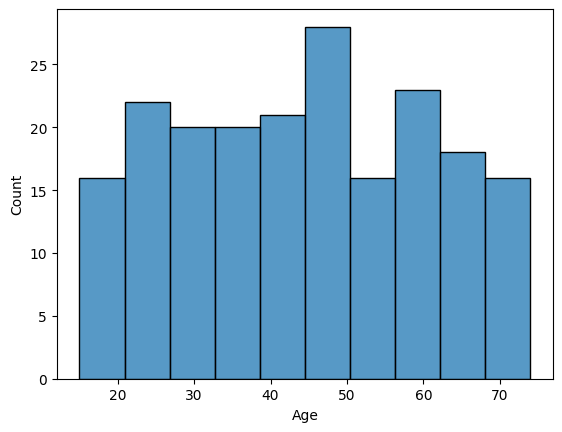

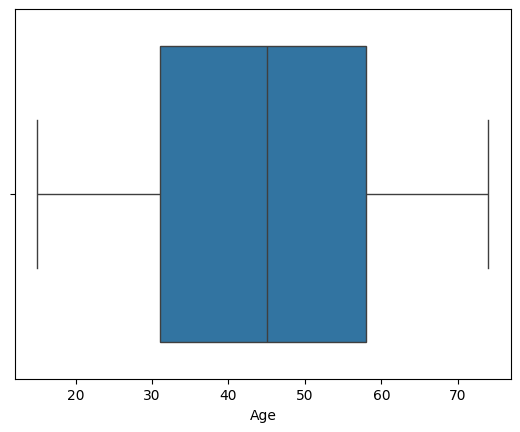

In [ ]:
#Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of a column
sns.histplot(df['Age'], bins=10)
plt.show()

# Box plot of a column
sns.boxplot(x=df['Age'])
plt.show()

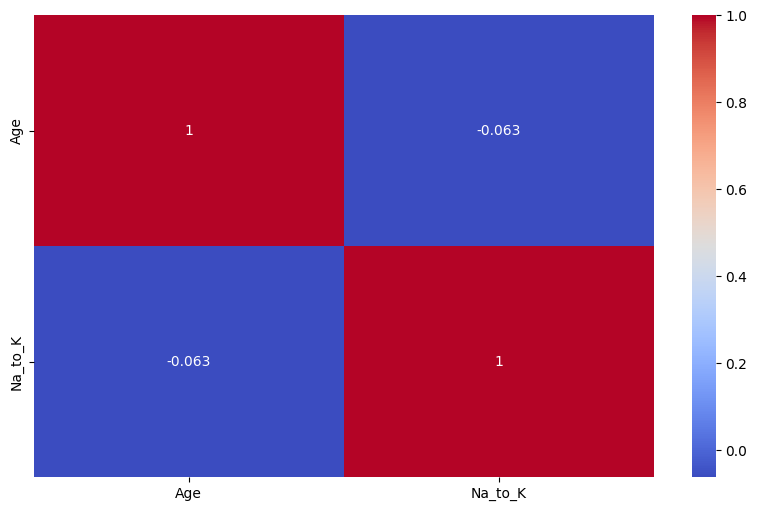

In [ ]:
#Bivariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap for numerical columns only
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

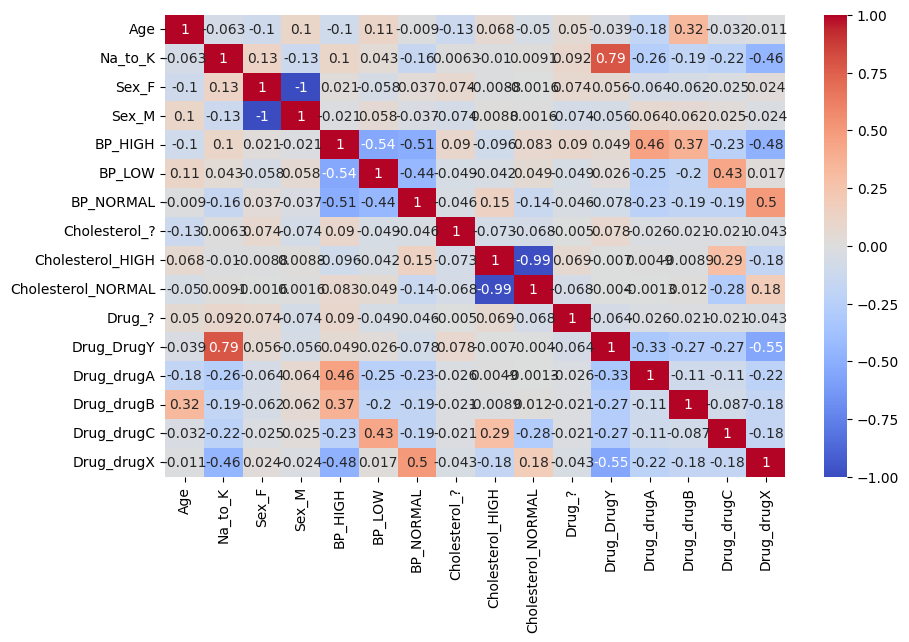

In [ ]:
# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df)

# Now create a heatmap with the encoded DataFrame
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

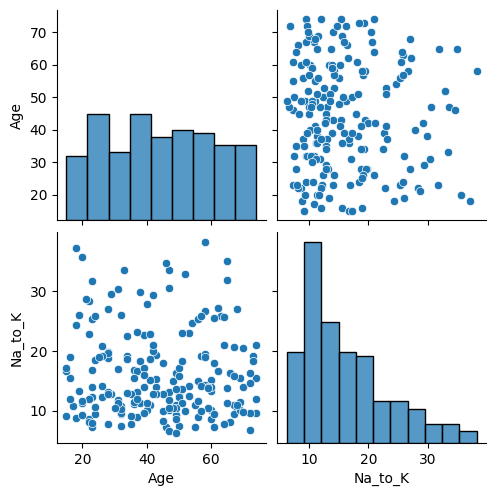

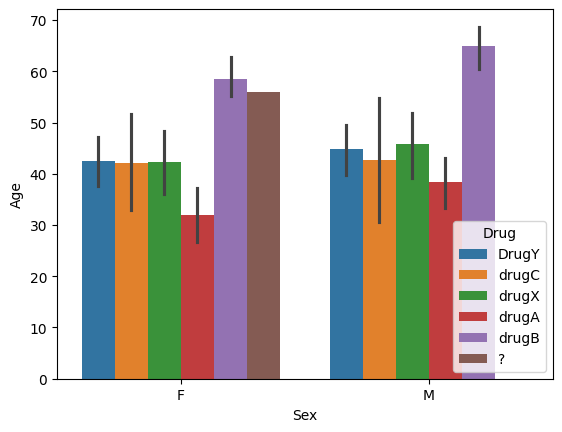

In [ ]:
#Multivariate Analysis
# Pair plot
sns.pairplot(df)
plt.show()

# Grouped bar plot
sns.barplot(x='Sex', y='Age', hue='Drug', data=df)
plt.show()

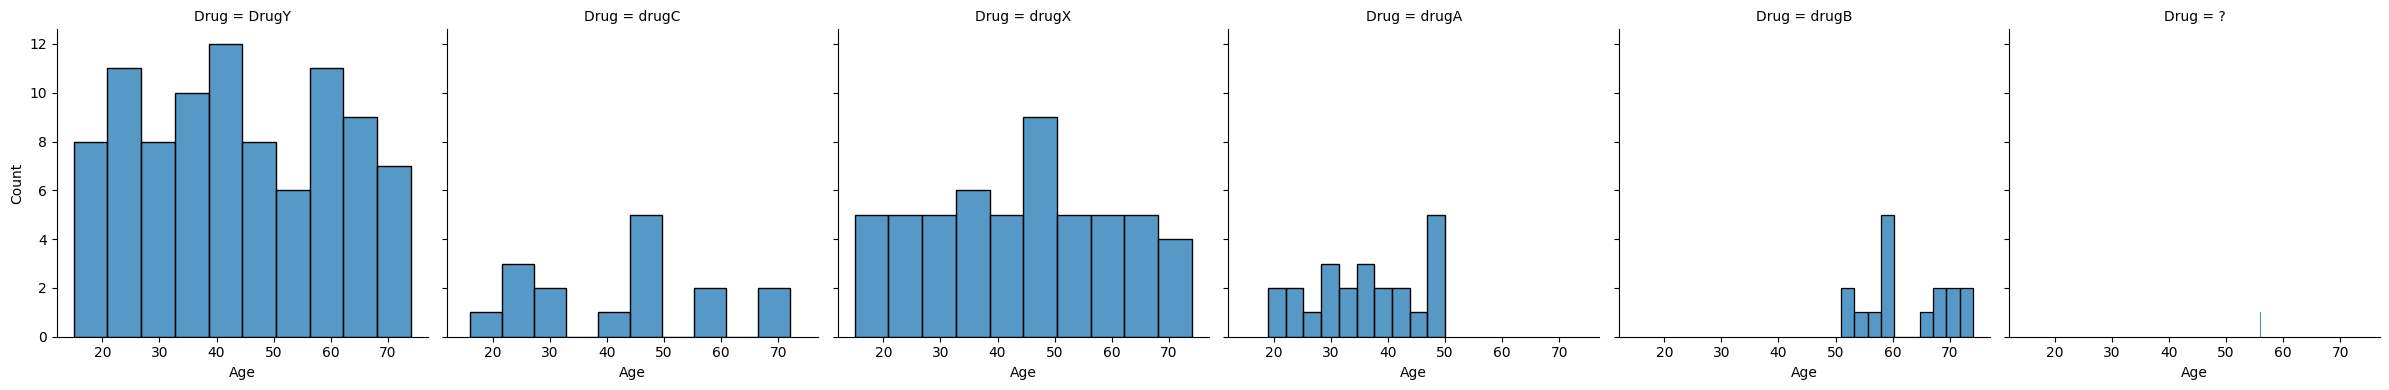

In [ ]:
#facetgrid
g = sns.FacetGrid(df, col='Drug', height=4, aspect=1)
g.map(sns.histplot, 'Age', bins=10)

plt.show()

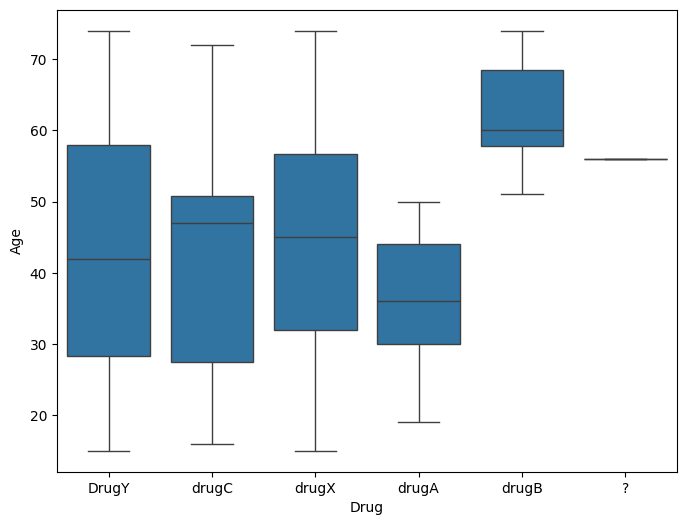

In [ ]:
#box plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Drug', y='Age', data=df)

# Show the plot
plt.show()

In [ ]:
# Check the column names of the DataFrame
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check column names again
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
from scipy import stats

corr = stats.pearsonr(df["Na_to_K"],df["Age"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.37457563990343007
cor:		 -0.06311949726772591


In [ ]:
# To find the correlation among the entire numerical records
# the columns using pearson method
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<Axes: >

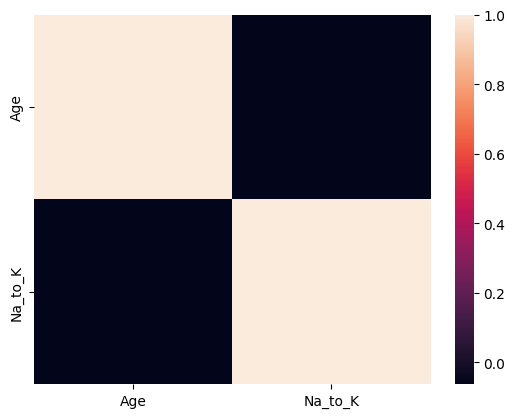

In [ ]:
#5. Visualize this correlation analysis using a heatmap.
#A heatmap is the best technique to make this look beautiful and easier to interpret:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

In [ ]:
#2. Check few entries inside the dataframe.
print(df.tail(10))
#print(df.head())

     Age Sex      BP Cholesterol  Na_to_K   Drug
190   58   M    HIGH        HIGH   18.991  DrugY
191   23   M    HIGH        HIGH    8.011  drugA
192   72   M     LOW        HIGH   16.310  DrugY
193   72   M     LOW        HIGH    6.769  drugC
194   46   F    HIGH         NaN   34.686  DrugY
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX


In [ ]:
#4. Note that the Date column has a data type of object.
#This is not correct. So, the next step is to correct the Date column
#convert object to datetime format
df['Na_to_K'] = pd.to_datetime(df['Na_to_K'])
df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,datetime64[ns]
Drug,object


In [ ]:
#6. Let's next change the index of our dataframe to the Date column
df = df.set_index('Age')
df.tail(3)

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
52,M,NORMAL,HIGH,1970-01-01 00:00:00.000000009,drugX
23,M,NORMAL,NORMAL,1970-01-01 00:00:00.000000014,drugX
40,F,LOW,NORMAL,1970-01-01 00:00:00.000000011,drugX


In [ ]:
df.shape

(200, 5)

In [ ]:
df = np.mean(df["Na_to_K"])
df

Timestamp('1970-01-01 00:00:00.000000015')

In [ ]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv'
df = pd.read_csv(url)

# Display basic information and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [ ]:
# Display column data types
print(df.dtypes)

# Separate data into numerical and categorical
numerical_data = df.select_dtypes(include=['float64', 'int64'])
categorical_data = df.select_dtypes(include=['object'])

print("Numerical Columns:", numerical_data.columns.tolist())
print("Categorical Columns:", categorical_data.columns.tolist())


Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object
Numerical Columns: ['Age', 'Na_to_K']
Categorical Columns: ['Sex', 'BP', 'Cholesterol', 'Drug']


In [ ]:
# Check for duplicates and drop them
df = df.drop_duplicates()
print("Data shape after deduplication:", df.shape)

# Replace missing or specific values if needed (e.g., replace zeros or certain categories)
# Example: Replace 'NaN' with a specific value for a column
df.fillna(value={'column_name': 'default_value'}, inplace=True)


Data shape after deduplication: (200, 6)


In [ ]:
# Example of discretization: bin age into categories
df['age_binned'] = pd.cut(df['Age'], bins=5, labels=['very young', 'young', 'middle aged', 'senior', 'elderly'])
print(df[['Age', 'age_binned']].head())


   Age   age_binned
0   23   very young
1   47  middle aged
2   47  middle aged
3   28        young
4   61       senior


In [ ]:
# Check for missing data
print(df.isnull().sum())

# Impute missing values using Mean, Median or Mode
# Automatically fill missing values with mean for numeric columns and mode for categorical columns
for col in df.columns:
    if df[col].isnull().sum() > 0:  # Check if the column has any missing values
        if df[col].dtype in ['float64', 'int64']:  # Numerical columns
            df[col] = df[col].fillna(df[col].mean())
        else:  # Categorical columns
            df[col] = df[col].fillna(df[col].mode()[0])  # Use the most frequent value


Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
age_binned     0
dtype: int64


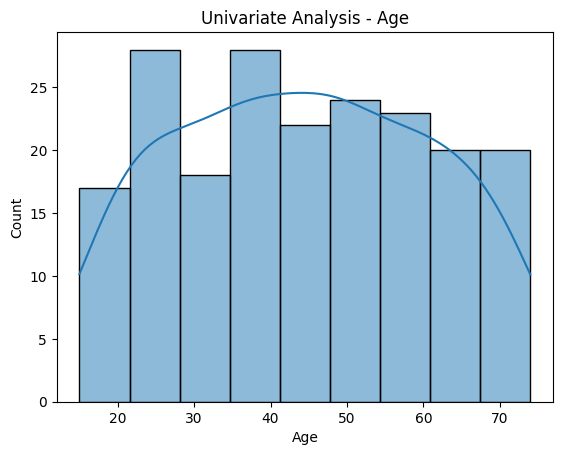

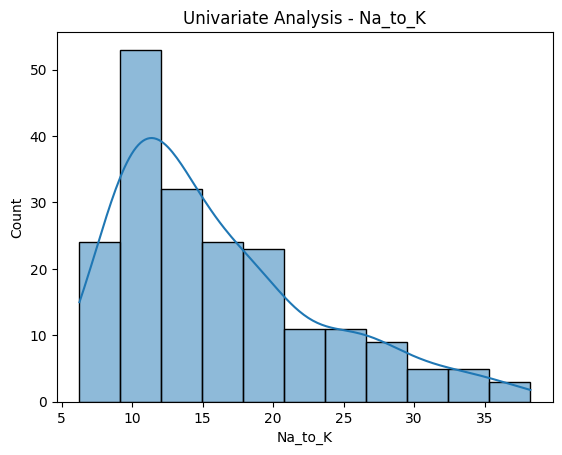

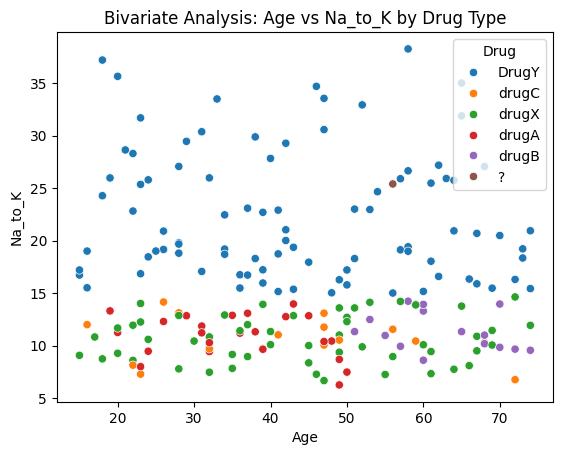

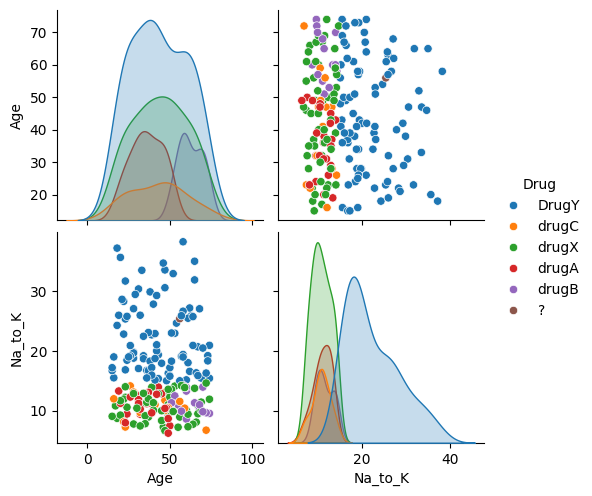

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis: Histogram for numerical variables
for col in numerical_data.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Univariate Analysis - {col}')
    plt.show()

# Bivariate analysis: Scatter plot for two variables
sns.scatterplot(x='Age', y='Na_to_K', hue='Drug', data=df)
plt.title("Bivariate Analysis: Age vs Na_to_K by Drug Type")
plt.show()

# Multivariate analysis: Pair plot
sns.pairplot(df, hue='Drug')
plt.show()


In [ ]:
# Statistical Summary
print(df.describe())


              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


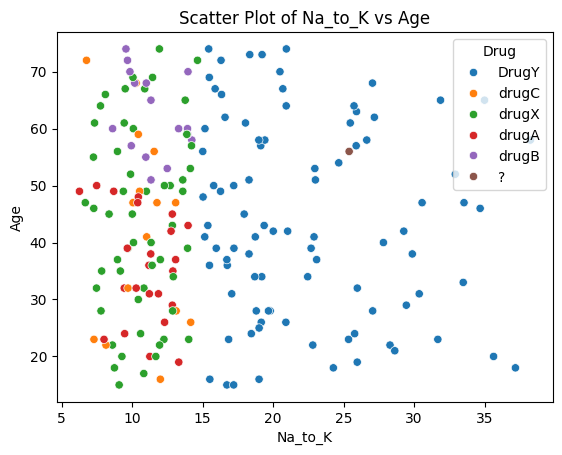

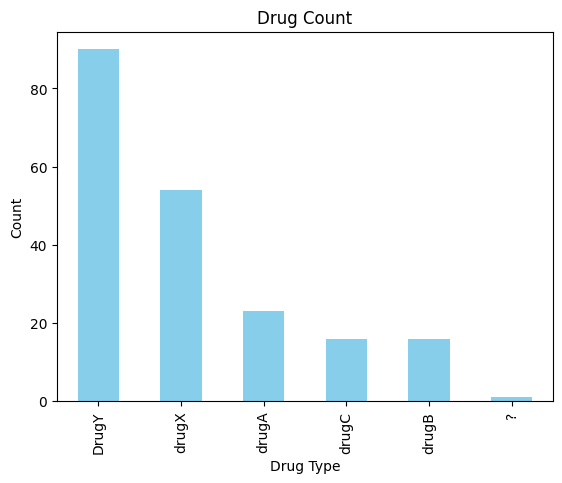

In [ ]:
# Scatter plot
sns.scatterplot(x='Na_to_K', y='Age', hue='Drug', data=df)
plt.title("Scatter Plot of Na_to_K vs Age")
plt.show()

# Bar plot
df['Drug'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Drug Count")
plt.xlabel("Drug Type")
plt.ylabel("Count")
plt.show()


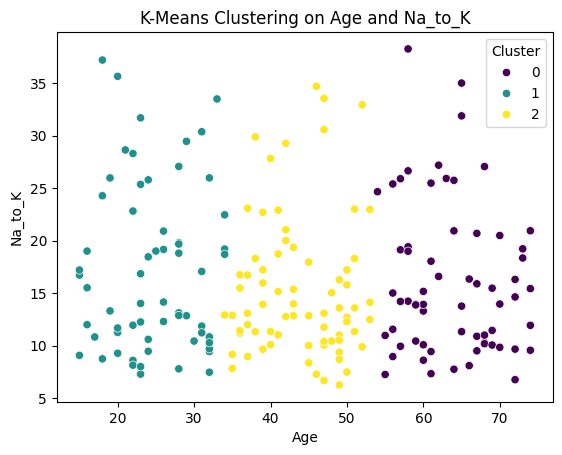

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Example clustering based on numerical features
X = df[['Age', 'Na_to_K']]
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize Clustering Results
sns.scatterplot(x='Age', y='Na_to_K', hue='Cluster', palette='viridis', data=df)
plt.title("K-Means Clustering on Age and Na_to_K")
plt.show()


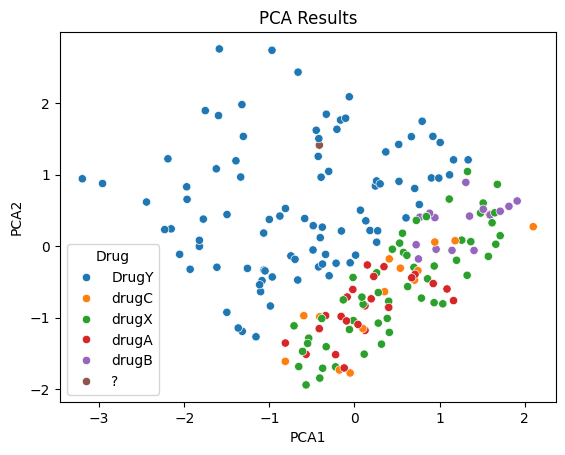

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Na_to_K']])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot PCA results
sns.scatterplot(x='PCA1', y='PCA2', hue='Drug', data=df)
plt.title("PCA Results")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['Drug_encoded'] = label_encoder.fit_transform(df['Drug'])

# Splitting data with the encoded target
X = df[['Age', 'Na_to_K']]
y = df['Drug_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.6823649739679294
R^2 Score: 0.4816403709102579
